Run the install cell below once to install project dependencies into the notebook kernel.

In [ ]:
# Install project requirements into the notebook kernel
%pip install -U -r requirements.txt -q

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


## Dataset on Huggingface
https://huggingface.co/datasets/McAuley-Lab/Amazon-Reviews-2023

In [4]:
from huggingface_hub import hf_hub_download
from datasets import load_dataset
import pandas as pd
import ujson as json
import os

REV_PATH = "raw/review_categories/Grocery_and_Gourmet_Food.jsonl"
rev_file = hf_hub_download(
repo_id="McAuley-Lab/Amazon-Reviews-2023",
filename=REV_PATH,
repo_type="dataset",
)
ds_reviews = load_dataset("json", data_files=rev_file, split="train")

c:\Users\Samiha\Documents\BTT AI Nestle Project\Nestle_1B-main\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
print(ds_reviews)

Dataset({
    features: ['rating', 'title', 'text', 'images', 'asin', 'parent_asin', 'user_id', 'timestamp', 'helpful_vote', 'verified_purchase'],
    num_rows: 14318520
})


In [6]:
# Define the desired sample size
sample_size = 500000

# 1. Shuffle the dataset first (using a seed ensures the sample is reproducible)
ds_reviews_shuffled = ds_reviews.shuffle(seed=123)

# 2. Select the first N records from the shuffled dataset
records = ds_reviews_shuffled.select(range(sample_size)) 

df_reviews = pd.json_normalize(records, sep=".")

print(df_reviews.head(20))

    rating                                             title  \
0      5.0                               great garlic flavor   
1      5.0                                     Great cereal!   
2      5.0                              Buy This If You Dare   
3      5.0                                           Awesome   
4      5.0                                        Five Stars   
5      5.0                                      5star review   
6      4.0                                      Xlnt flavor!   
7      3.0                                             Stale   
8      4.0                    It's ok, the Mexican is better   
9      3.0                                       Three Stars   
10     1.0  They should call it Sardine with skin and bones.   
11     5.0                                Very good variety!   
12     1.0                    I wanted to love these noodles   
13     5.0                                    GREAT SHOOTING   
14     5.0                              

In [7]:
ds_reviews.shape

(14318520, 10)

# Found a way to import meta dataset

In [8]:
from datasets import Dataset

REV_PATH = "raw/meta_categories/meta_Grocery_and_Gourmet_Food.jsonl"
rev_file = hf_hub_download(
repo_id="McAuley-Lab/Amazon-Reviews-2023",
filename=REV_PATH,
repo_type="dataset",
)

df = pd.read_json(
    rev_file,
    lines=True,
)

df = df[df['main_category'] == 'Grocery']

df.head(5)


,main_category,title,average_rating,rating_number,features,description,price,images,videos,store,categories,details,parent_asin,bought_together,subtitle,author
0,Grocery,Dark Roast Pure Coffee,4.7,9,[],[],None,[{'thumb': 'https://m.media-amazon.com/images/...,[{'title': 'YouCut_20220Cafe Du Monde Coffee C...,Luzianne,"[Grocery & Gourmet Food, Beverages, Coffee]","{'Brand': 'Luzianne', 'Item Form': 'Ground', '...",B00NE08WM6,NaN,NaN,NaN
1,Grocery,PICARAS Galletas Peruanas Bañadas en Chocolate...,4.5,12,[2 Bags of PICARAS Galletas Bañadas en Chocola...,[2 Bags of PICARAS Galletas Bañadas en Chocola...,15.99,[{'thumb': 'https://m.media-amazon.com/images/...,[],Winters,"[Grocery & Gourmet Food, Breads & Bakery, Cook...","{'Flavor': 'chocolate', 'Unit Count': '12.00 C...",B084Q13Q5Q,NaN,NaN,NaN
2,Grocery,Chipped Beef and Gravy By Patterson's - Great ...,3.2,5,[Six (6) 8-ounce cans of delicious chipped bee...,[Delicious corned beef gravy is ready when you...,None,[{'thumb': 'https://m.media-amazon.com/images/...,[],Pattersons,"[Grocery & Gourmet Food, Pantry Staples, Canne...",{'Package Dimensions': '8.4 x 5.8 x 3.4 inches...,B00KBRUYVM,NaN,NaN,NaN
3,Grocery,Asher's Sugar Free Milk Chocolate Cordial Cher...,5.0,6,[],[],29.99,[{'thumb': 'https://m.media-amazon.com/images/...,[{'title': 'No Sugar Added Chocolate Truffles'...,Generic,"[Grocery & Gourmet Food, Snacks & Sweets, Choc...","{'Brand': 'Generic', 'Item Form': 'Ball', 'Cho...",B0BN4PW255,NaN,NaN,NaN
4,Grocery,Messmer Peppermint 25 bags (6er pack),3.5,5,[],[],29.99,[{'thumb': 'https://m.media-amazon.com/images/...,[],Messmer,[],"{'Brand': 'Messmer', 'Item Form': 'Teabags', '...",B06X9DC27H,NaN,NaN,NaN


In [9]:
keep_cols = ["average_rating", "rating_number","details","parent_asin"]

df = df[keep_cols]
df["details"] = df["details"].str.get("Flavor")
print(df.head(5))

   average_rating  rating_number    details parent_asin
0             4.7              9       None  B00NE08WM6
1             4.5             12  chocolate  B084Q13Q5Q
2             3.2              5       None  B00KBRUYVM
3             5.0              6  Chocolate  B0BN4PW255
4             3.5              5       None  B06X9DC27H


In [10]:
df = df.dropna(subset=['details'])
display(df.head())

,average_rating,rating_number,details,parent_asin
1,4.5,12,chocolate,B084Q13Q5Q
3,5.0,6,Chocolate,B0BN4PW255
6,5.0,2,Red Crab,B002HQF1BI
18,4.4,157,Savory,B005GTTQMI
23,4.2,474,Cherry,B097NMZRBR


In [11]:
rating_num_median = df['rating_number'].median()
print(rating_num_median)
print(df.shape)

15.0
(138685, 4)


In [12]:
df = df[df['rating_number'] >= rating_num_median]
print(df.head(10))

    average_rating  rating_number             details parent_asin
18             4.4            157              Savory  B005GTTQMI
23             4.2            474              Cherry  B097NMZRBR
26             4.6             41                 Hot  B00AN0ODVY
36             4.7            503                cafe  B01EM498G6
37             3.7            493     10 PACK SAMPLER  B07CP39T8G
39             4.0             58            Licorice  B00NZ8OCNU
40             4.0             19           Chamomile  B07ZVBKYWV
41             4.4             47                Pork  B088GYGLZG
42             4.2             21            Barbecue  B077V3RTZV
45             4.6             66  Sweet or Scary Mix  B01LXZTQB1


# **Filtering flavors**

In [13]:
top_flavors = df["details"].value_counts().nlargest(25).index

df = df[df["details"].isin(top_flavors)]

print(df["details"].value_counts())

details
Chocolate         3656
Original          1391
Assorted          1298
Fruit             1093
Milk Chocolate    1014
Caramel           1006
Vanilla            972
Strawberry         856
Dark Chocolate     818
Cherry             757
Lemon              745
Coffee             696
Beef               694
Cinnamon           682
Mint               654
Orange             625
Peppermint         614
Coconut            542
Espresso           524
Honey              465
Butter             463
Sour               440
Ginger             432
Chicken            410
Almond             405
Name: count, dtype: int64


Deleting irrelvant flavors

In [14]:
irrelevant = ["Original", "Assorted"]
df = df[~df["details"].isin(irrelevant)]
df.head(25)

,average_rating,rating_number,details,parent_asin
23,4.2,474,Cherry,B097NMZRBR
69,4.7,665,Peppermint,B00250M2ZY
72,3.6,52,Chocolate,B096XY398G
113,4.4,229,Espresso,B00679HRUY
132,4.4,290,Dark Chocolate,B0BZ7T51JZ
188,4.7,18,Chocolate,B00IMQ1O9A
224,4.1,188,Milk Chocolate,B0979Q4ZW1
279,4.3,483,Beef,B00YJX55R2
328,4.6,1766,Fruit,B01M5KNOF5
334,2.6,32,Caramel,B00II5VYM2


In [15]:
df.shape

(18563, 4)

In [16]:
df_merged_inner = pd.merge(
    df,
    df_reviews,
    on='parent_asin',
    how='inner'
)

columns_to_drop = [
    'images',
    'asin',
    'helpful_vote',
    'verified_purchase',
    'title'
]

df_merged_inner.drop(columns=columns_to_drop, axis=1, inplace=True)

print(df_merged_inner.columns.tolist())
print(f"\nNew DataFrame shape: {df_merged_inner.shape}")

print(df_merged_inner.head(5))


['average_rating', 'rating_number', 'details', 'parent_asin', 'rating', 'text', 'user_id', 'timestamp']

New DataFrame shape: (17109, 8)
   average_rating  rating_number     details parent_asin  rating  \
0             4.2            474      Cherry  B097NMZRBR     1.0   
1             4.7            665  Peppermint  B00250M2ZY     5.0   
2             4.7            665  Peppermint  B00250M2ZY     5.0   
3             4.7            665  Peppermint  B00250M2ZY     5.0   
4             4.7            665  Peppermint  B00250M2ZY     5.0   

                                                text  \
0  Sour cherries have always been my favorite can...   
1  Huge container for a great price.  My mother i...   
2  These are the real deal! They melt in your mou...   
3                                              GREAT   
4                             Great stocking stuffer   

                        user_id      timestamp  
0  AFRGK5Q7DQV2UKTCT6VQOOZKGNMQ  1657757697745  
1  AHN64YGR6BS5KUZB

In [17]:
irrelevant = ["Original", "Assorted"]

df_clean = df_merged_inner[~df_merged_inner["details"].isin(irrelevant)]

df_clean['timestamp'] = pd.to_datetime(df_clean['timestamp'], unit='ms')
df_clean['year_month'] = df_clean['timestamp'].dt.to_period('M').astype(str)

trend_df = (
    df_clean
    .groupby(['details', 'year_month'])['rating']
    .mean()
    .reset_index()
)

df_merged_inner.columns

Index(['average_rating', 'rating_number', 'details', 'parent_asin', 'rating',
       'text', 'user_id', 'timestamp'],
      dtype='object')

In [18]:
df_merged_inner.columns

# ['average_rating', 'rating_number', 'details', 'parent_asin', 
#  'rating', 'text', 'user_id', 'timestamp']

df_merged_inner['details'].unique()

import pandas as pd
#Convert timestamp to datetime
df_merged_inner['timestamp'] = pd.to_datetime(df_merged_inner['timestamp'], unit='ms')
#df_merged_inner['year_month'] = df_merged_inner['timestamp'].dt.to_period('M').astype(str)
df_merged_inner['year_month'] = df_merged_inner['timestamp'].dt.to_period('M').dt.to_timestamp()


#avg rating per month
trend_df = (
    df_merged_inner
    .groupby(['details', 'year_month'])['rating']
    .mean()
    .reset_index()
)
trend_df.head()


# trend_df['details'].value_counts()
# trend_df.head(20)


,details,year_month,rating
0,Almond,2012-01-01,3.0
1,Almond,2012-06-01,5.0
2,Almond,2012-09-01,1.0
3,Almond,2012-10-01,4.0
4,Almond,2012-11-01,5.0


Average Rating of Top 10 Most-Reviewed Flavors

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Chocolate'),
  Text(1, 0, 'Caramel'),
  Text(2, 0, 'Vanilla'),
  Text(3, 0, 'Milk Chocolate'),
  Text(4, 0, 'Fruit'),
  Text(5, 0, 'Coffee'),
  Text(6, 0, 'Cinnamon'),
  Text(7, 0, 'Cherry'),
  Text(8, 0, 'Espresso'),
  Text(9, 0, 'Orange')])

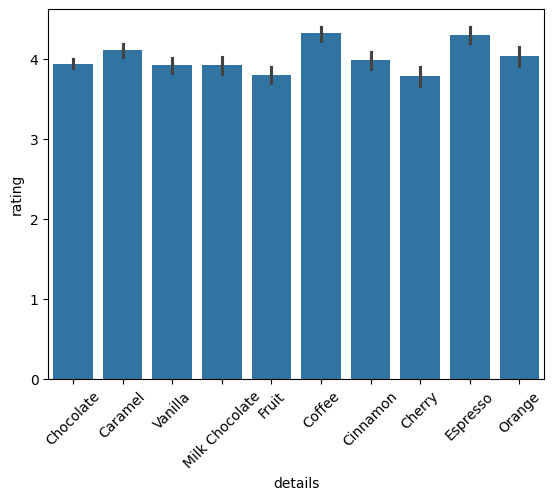

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(
    data=df_merged_inner,
    x='details',
    y='rating',
    estimator='mean',
    order=df_merged_inner['details'].value_counts().index[:10]
)
plt.xticks(rotation=45)

In [20]:
df_merged_inner.shape

(17109, 9)

Trends over time

FacetGrid (small multiples per flavor)
I split the data so every flavor gets its own mini-trend chart. This way each flavor becomes readable. Trend direction becomes obvious (stable, increasing, decreasing, seasonal, etc.). This is the first visualization where patterns became meaningful. Some flavors like Vanilla show stable ratings, while others like Cinnamon show volatility.

In [21]:
top_flavors = df_merged_inner['details'].value_counts().head(10).index
trend_df_filtered = trend_df[trend_df['details'].isin(top_flavors)]

In [22]:
trend_df['rating_smooth'] = trend_df.groupby('details')['rating'].transform(lambda x: x.rolling(3, min_periods=1).mean())

In [23]:
# Merge reviews with product data
df_merged = pd.merge(
    df,
    df_reviews[['parent_asin', 'rating', 'timestamp', 'text']],
    on='parent_asin',
    how='left'
 )

# Drop flavors with too few reviews
min_reviews = 30
valid_flavors = df_merged.groupby('details').size()
valid_flavors = valid_flavors[valid_flavors >= min_reviews].index
df_final = df_merged[df_merged['details'].isin(valid_flavors)]

# Sort by timestamp
df_final = df_final.sort_values('timestamp')

# Create smoothed rating
df_final['rating_smooth'] = (
    df_final.groupby('details')['rating']
           .transform(lambda x: x.rolling(3, min_periods=1).mean())
)


Plot Each Flavor Separately (FacetGrid)

c:\Users\Samiha\Documents\BTT AI Nestle Project\Nestle_1B-main\venv\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\Samiha\Documents\BTT AI Nestle Project\Nestle_1B-main\venv\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\Samiha\Documents\BTT AI Nestle Project\Nestle_1B-main\venv\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\Samiha\Documents\BTT AI Nestle Project\Nestle_1B-main\venv\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\Samiha\Documents\BTT AI Nestle Project\

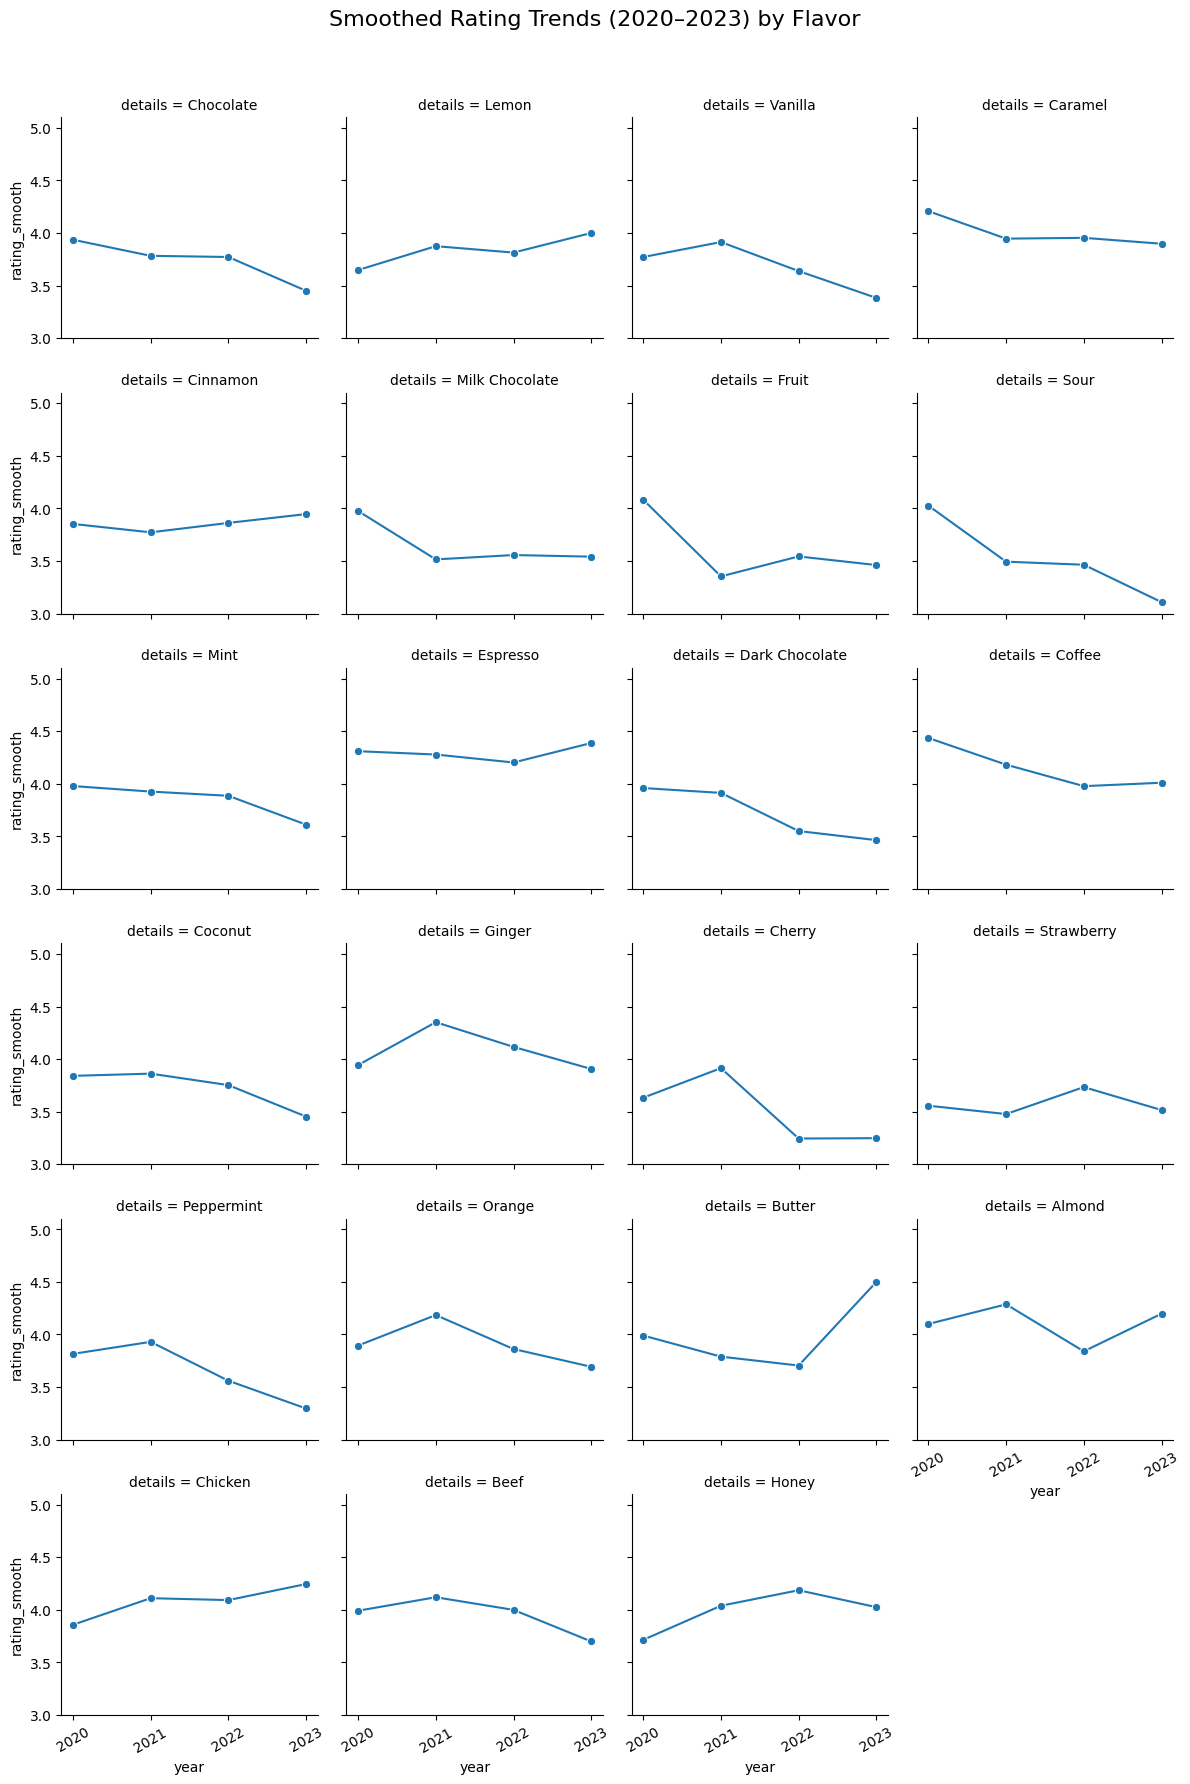

In [24]:
# ---------------------------
# 1. Filter to 2020–2023 Only
# ---------------------------

df_final['timestamp'] = pd.to_datetime(df_final['timestamp'], unit='ms', errors='coerce')
df_final['year'] = df_final['timestamp'].dt.year
df_final = df_final[df_final['year'] >= 2020]

# ------------------------------------------
# 2. Smooth Ratings (Rolling Mean)
# using a 3-point rolling window
# ------------------------------------------
df_final['rating_smooth'] = (
    df_final.sort_values('timestamp')
    .groupby('details')['rating']
    .transform(lambda x: x.rolling(3, min_periods=1).mean())
)

# ------------------------------------------
# 3. Plot FacetGrid Trends by Flavor
# ------------------------------------------
g = sns.relplot(
    data=df_final,
    x='year',
    y='rating_smooth',
    col='details',
    col_wrap=4,
    kind='line',
    ci=None,     
    height=3,
    marker='o', 
    facet_kws={'sharex': True, 'sharey': True}
)

# ------------------------------------------
# 4. Clean Up Tick Labels (NO MORE WEIRD LINES)
# ------------------------------------------
for ax in g.axes.flatten():
    ax.set_xticks([2020, 2021, 2022, 2023])  # clean yearly ticks
    ax.tick_params(axis='x', rotation=30)   # small, readable
    ax.set_ylim(3, 5.1)                     # consistent y-scale

plt.subplots_adjust(top=0.92)
g.fig.suptitle("Smoothed Rating Trends (2020–2023) by Flavor", fontsize=16)
plt.show()


Plot Top Flavors Together (Smoothed)

Text(0.5, 1.0, 'Average Review Rating per Flavor')

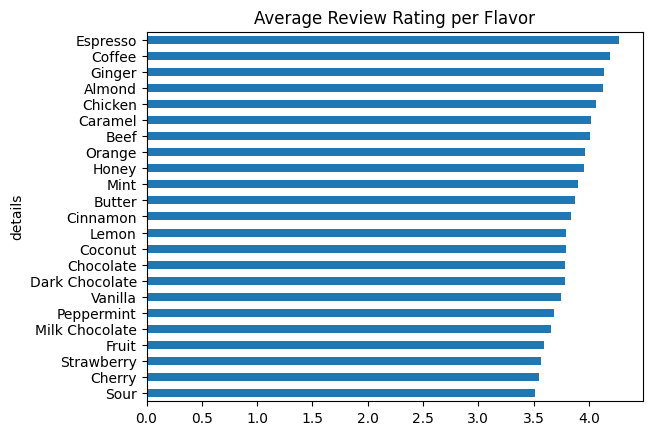

In [25]:
df_final.groupby('details')['rating'].mean().sort_values().plot(kind='barh')
plt.title("Average Review Rating per Flavor")

## Sentiment analysis with a BERT sentiment model

We will use a pre-trained BERT-style sentiment model from Hugging Face (`nlptown/bert-base-multilingual-uncased-sentiment`) to infer sentiment from review text. It outputs 1–5 star style labels.

The notebook cells below load the model, run batched inference on `df_final['text']`, attach numeric sentiment scores (1-5) to `df_final`, then aggregate and plot trends by flavor (2020–2023).

In [26]:
# Load the BERT sentiment pipeline
import torch
from transformers import pipeline
model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
device = 0 if torch.cuda.is_available() else -1
sentiment_pipe = pipeline(
    "sentiment-analysis",
    model=model_name,
    tokenizer=model_name,
    device=device
)
print('Loaded pipeline on device', device)

Device set to use cpu


Loaded pipeline on device -1


In [ ]:
# Run batched inference over `df_final['text']` and attach results
import re
from tqdm import tqdm
try:
    df_final
except NameError:
    raise RuntimeError('DataFrame `df_final` not found. Run the earlier data-prep cells first.')
# Prepare texts
texts = df_final['text'].fillna('').astype(str).tolist()
batch_size = 32
results = []
for i in tqdm(range(0, len(texts), batch_size)):
    batch = texts[i:i+batch_size]
    # Prefer letting the tokenizer handle truncation to avoid model indexing errors
    try:
        outs = sentiment_pipe(batch, truncation=True, max_length=512)
    except RuntimeError as e:
        # Fallback: process items individually (slower) and ensure truncated input
        outs = []
        for t in batch:
            try:
                out = sentiment_pipe(t, truncation=True, max_length=512)
                # pipeline returns a list for a single input, take first element
                outs.append(out[0] if isinstance(out, list) else out)
            except Exception as e2:
                outs.append({'label': None, 'score': None})
    # Normalize outputs: some pipelines return list-of-lists
    for item in outs:
        if isinstance(item, list):
            results.append(item[0])
        else:
            results.append(item)
# Ensure results length matches texts length
if len(results) < len(texts):
    # pad with Nones (shouldn't normally happen)
    pad_count = len(texts) - len(results)
    results.extend([{'label': None, 'score': None}] * pad_count)
# Parse labels like '1 star' or '5 stars' into integers
labels = []
scores = []
for out in results:
    label = out.get('label') if isinstance(out, dict) else None
    score = out.get('score') if isinstance(out, dict) else None
    # Some models return labels like '1 star' or '5 stars', extract digit if present
    if isinstance(label, str):
        m = re.search(r'([1-5])', label)
        num = int(m.group(1)) if m else None
    else:
        num = None
    labels.append(label)
    # Convert score to a sensible 1-5 scale if model returned a star label + score (score is confidence)
    # If the model already returns a numeric star (some models do), prefer that.
    if num is not None:
        scores.append(num)
    else:
        # If we only have a probability score, leave numeric sentiment as None
        scores.append(None)
# Attach to df_final (same order as df_final)
df_final['bert_sentiment_label'] = labels
df_final['bert_sentiment_score'] = scores
print('Attached sentiment scores to df_final:', df_final[['bert_sentiment_label','bert_sentiment_score']].shape)

  0%|          | 0/303 [00:00<?, ?it/s]

100%|██████████| 303/303 [17:17<00:00,  3.42s/it]

Attached sentiment scores to df_final: (9667, 2)


#### About `bert_sentiment_score`

- **What it is:** Numeric sentiment on a 1–5 star scale assigned by the BERT model (the `nlptown/bert-base-multilingual-uncased-sentiment` pipeline).
- **Meaning:** `1` = very negative, `2` = negative, `3` = neutral, `4` = positive, `5` = very positive.
- **How it's populated:** We extract the integer star from model labels like `"1 star"` and store it in `bert_sentiment_score`. If a value is `None`, the pipeline returned only a confidence score or inference failed for that review.
- **Note:** Inputs are truncated to 512 tokens before inference; very long reviews may lose context and this can affect the score.

In [28]:
df_final.head()

,average_rating,rating_number,details,parent_asin,rating,timestamp,text,rating_smooth,year,bert_sentiment_label,bert_sentiment_score
14030,4.2,33,Chocolate,B07HVKQ8MF,5.0,2020-01-01 00:52:17.153,I loved this product so much! I will definitel...,5.0,2020.0,5 stars,5
7032,4.2,1507,Lemon,B003DU4MGM,5.0,2020-01-01 00:52:19.984,Each small tartlette is individually wrapped a...,5.0,2020.0,5 stars,5
22015,4.1,268,Chocolate,B07YXFXNNV,4.0,2020-01-01 04:21:08.786,Super cute. It was just a lot smaller than I ...,4.5,2020.0,4 stars,4
25327,4.7,380,Vanilla,B000B8SR8I,5.0,2020-01-01 06:18:41.436,The coffee shop at our hospital carried this b...,5.0,2020.0,5 stars,5
3042,4.6,3178,Caramel,B0B5FCW9NB,5.0,2020-01-01 11:59:26.711,The 60 pops arrived in a resealable bag to kee...,5.0,2020.0,5 stars,5


In [29]:
df_final.shape

(9667, 11)

Top-10 flavors (by review count) from df_final:
details
Chocolate         1604
Caramel            560
Fruit              559
Milk Chocolate     547
Vanilla            542
Cherry             425
Ginger             412
Orange             404
Cinnamon           393
Strawberry         382
Name: count, dtype: int64


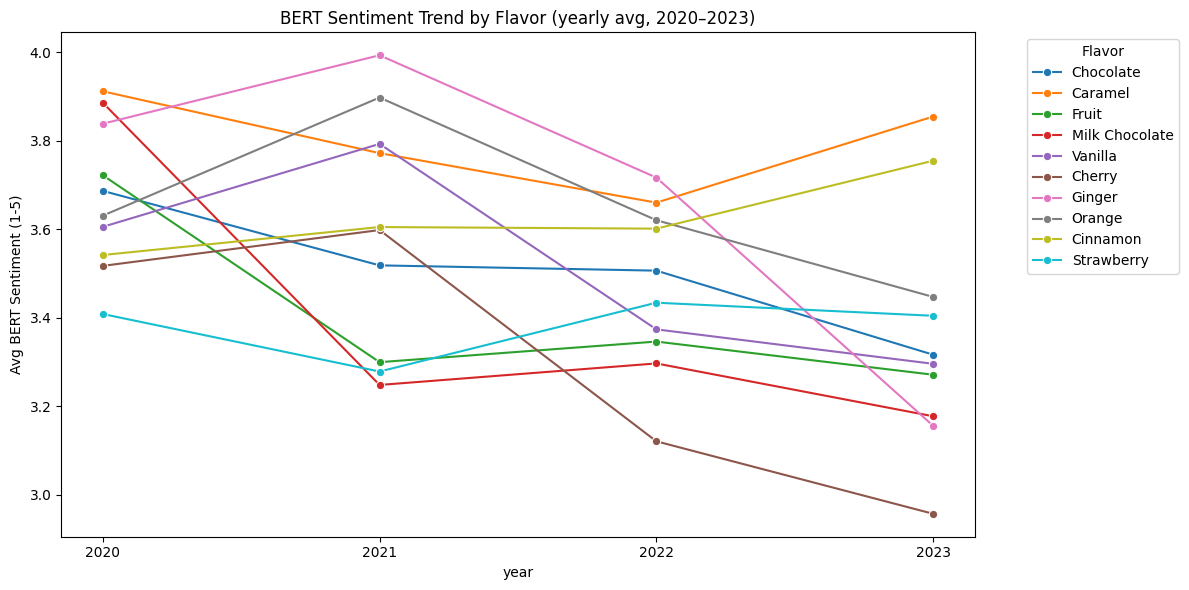

c:\Users\Samiha\Documents\BTT AI Nestle Project\Nestle_1B-main\venv\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\Samiha\Documents\BTT AI Nestle Project\Nestle_1B-main\venv\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\Samiha\Documents\BTT AI Nestle Project\Nestle_1B-main\venv\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\Samiha\Documents\BTT AI Nestle Project\Nestle_1B-main\venv\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\Samiha\Documents\BTT AI Nestle Project\

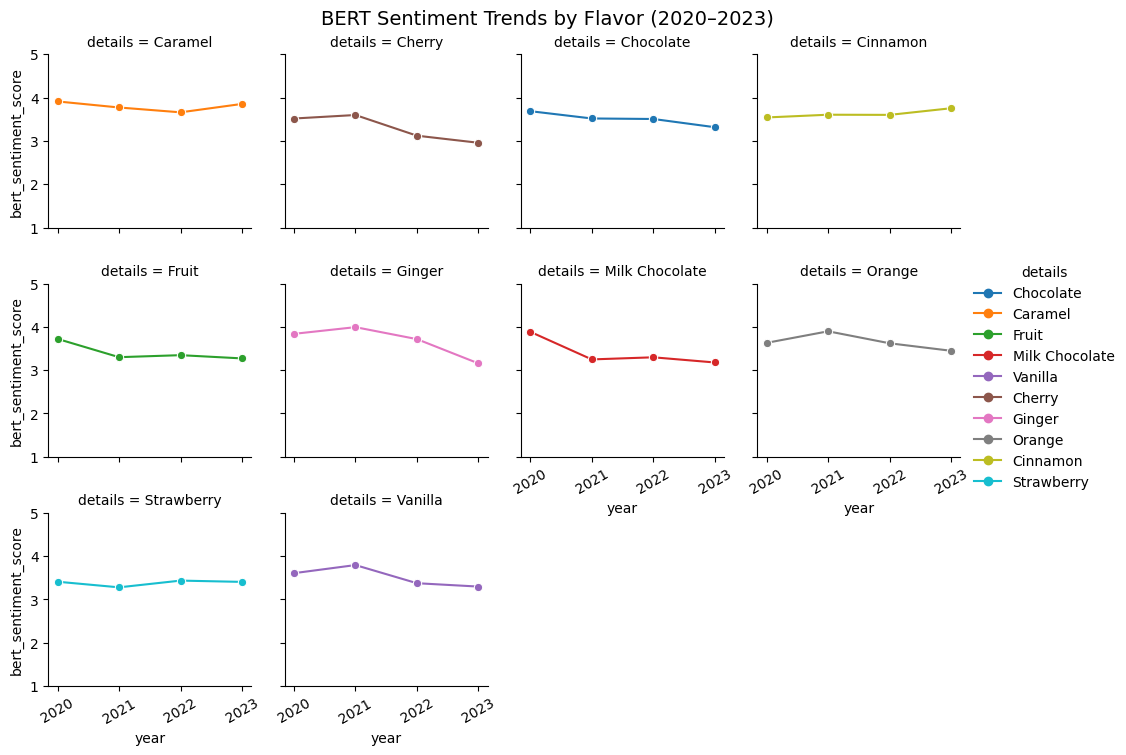

In [30]:
# Aggregate sentiment by flavor and year (2020-2023), then plot top flavors over time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure timestamp is datetime and create year
if not pd.api.types.is_datetime64_any_dtype(df_final['timestamp']):
    try:
        df_final['timestamp'] = pd.to_datetime(df_final['timestamp'], unit='ms', errors='coerce')
    except Exception:
        df_final['timestamp'] = pd.to_datetime(df_final['timestamp'], errors='coerce')
df_final['year'] = df_final['timestamp'].dt.year

# Filter to 2020-2023
df_year = df_final[df_final['year'].between(2020, 2023)]

# Compute yearly average BERT sentiment per flavor (ignores NaNs)
sentiment_trend = df_year.groupby(['details','year'])['bert_sentiment_score'].mean().reset_index()

# Determine top-10 most-reviewed flavors using df_final (where sentiment scores live)
top_flavors = df_final['details'].value_counts().head(10).index.tolist()

# Print the top flavors and their review counts for confirmation
print('Top-10 flavors (by review count) from df_final:')
print(df_final['details'].value_counts().head(10))

# Filter sentiment_trend to only those top flavors
sent_plot = sentiment_trend[sentiment_trend['details'].isin(top_flavors)]

# -- 1) Combined yearly trend (all top flavors) --
plt.figure(figsize=(12,6))
sns.lineplot(data=sent_plot, x='year', y='bert_sentiment_score', hue='details', hue_order=top_flavors, marker='o', palette=sns.color_palette('tab10', n_colors=len(top_flavors)))
plt.xticks([2020,2021,2022,2023])
plt.ylabel('Avg BERT Sentiment (1-5)')
plt.title('BERT Sentiment Trend by Flavor (yearly avg, 2020–2023)')
plt.legend(title='Flavor', bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()

# -- 2) Small-multiples: one yearly trend plot per flavor (FacetGrid) --
g = sns.relplot(
    data=sent_plot,
    x='year',
    y='bert_sentiment_score',
    col='details',
    col_wrap=4,
    kind='line',
    ci=None,
    height=2.5,
    facet_kws={'sharex': True, 'sharey': True},
    marker='o',
    hue='details',
    hue_order=top_flavors,
    palette=sns.color_palette('tab10', n_colors=len(top_flavors))
 )
# Clean up axes for readability
for ax in g.axes.flatten():
    ax.set_xticks([2020,2021,2022,2023])
    ax.tick_params(axis='x', rotation=30)
    # set consistent y-scale 1.0-5.0 (model outputs 1-5 star scale)
    ax.set_ylim(1.0, 5.0)
# Title and layout
plt.subplots_adjust(top=0.92)
g.fig.suptitle('BERT Sentiment Trends by Flavor (2020–2023)', fontsize=14)
plt.show()

In [31]:
# Baseline: map numeric ratings to simple sentiment categories and compare to BERT
def rating_to_sentiment(r):
    if r <= 2:
        return 'negative'
    elif r == 3:
        return 'neutral'
    else:
        return 'positive'

df_final['rating_sentiment'] = df_final['rating'].apply(rating_to_sentiment)
df_final['bert_sentiment_cat'] = df_final['bert_sentiment_score'].apply(lambda s: 'negative' if s<=2 else ('neutral' if s==3 else 'positive'))

# Show confusion / agreement table
confusion = pd.crosstab(df_final['rating_sentiment'], df_final['bert_sentiment_cat'])
display(confusion)

# Normalized (by rows) for easier comparison
confusion_norm = pd.crosstab(df_final['rating_sentiment'], df_final['bert_sentiment_cat'], normalize='index')
display(confusion_norm)

bert_sentiment_cat,negative,neutral,positive
rating_sentiment,,,
negative,2143,222,81
neutral,322,237,92
positive,346,474,5750


bert_sentiment_cat,negative,neutral,positive
rating_sentiment,,,
negative,0.876124,0.090760,0.033115
neutral,0.494624,0.364055,0.141321
positive,0.052664,0.072146,0.875190


The final cell compares the numeric star rating given by the customer (the original rating column) to the BERT sentiment score assigned by the model.

#### Sentiment Categorization

The code first maps both the original customer rating and the BERT score into three simple categories:

- Negative: Original rating $\leq 2$ OR BERT score $\leq 2$
- Neutral: Original rating $= 3$ OR BERT score $= 3$
- Positive: Original rating $\geq 4$ OR BERT score $\geq 4$

#### Confusion Table (Counts)

- Rows (rating_sentiment): The sentiment category based on the customer's original 1-5 star rating.
- Columns (bert_sentiment_cat): The sentiment category based on the BERT model's 1-5 star score.

#### Interpretation (e.g., Row 1):

- There were 2143 reviews where the customer rating was negative ($\leq 2$) AND the BERT score was also negative ($\leq 2$). This is strong agreement.
- There were 81 reviews where the customer rating was negative, but the BERT model scored them as positive ($\geq 4$). This is strong disagreement.

#### Normalized Confusion Table (Percentages)

This table shows the same data, but normalized by row, meaning each row adds up to 1 (or 100%).

#### Interpretation (e.g., Row 3 - Positive):

- When a customer gave a positive rating (≥4 stars), the BERT model agreed and scored it as positive 87.5% of the time.
- It only disagreed and scored a customer's positive review as negative (≤2) 5.2% of the time.

Purpose: This normalization makes it easy to assess the accuracy of the BERT model against the existing star ratings. The model appears to be highly reliable, especially for clear positive and negative reviews. The code is successfully applying a modern NLP model to extract more nuanced data (BERT sentiment) than a simple star rating and using that data to plot trends and verify the model's accuracy.

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix

if 'eval_df' not in globals():
    print('Computing eval_df and confusion matrices from `df_final`')
    eval_df = df_final[['rating','bert_sentiment_score']].dropna().copy()
    eval_df = eval_df[(eval_df['bert_sentiment_score'].notna()) & (eval_df['rating'].notna())]
    eval_df['rating'] = eval_df['rating'].astype(int)
    eval_df['bert_pred'] = eval_df['bert_sentiment_score'].astype(int)
    
    # 5-class confusion
    y_true_5 = eval_df['rating']
    y_pred_5 = eval_df['bert_pred']
    cm5 = confusion_matrix(y_true_5, y_pred_5, labels=[1,2,3,4,5])
    cm5_df = pd.DataFrame(cm5, index=[1,2,3,4,5], columns=[1,2,3,4,5])
   
    # 3-class mapping and confusion
    def _map3(r):
        if r <= 2:
            return 'negative'
        elif r == 3:
            return 'neutral'
        else:
            return 'positive'
    eval_df['true_3'] = eval_df['rating'].apply(_map3)
    eval_df['pred_3'] = eval_df['bert_pred'].apply(_map3)
    cm3 = confusion_matrix(eval_df['true_3'], eval_df['pred_3'], labels=['negative','neutral','positive'])
    cm3_df = pd.DataFrame(cm3, index=['negative','neutral','positive'], columns=['negative','neutral','positive'])
    print('Built eval_df, cm5_df and cm3_df in the notebook state. Run the visualization cell now.')
else:
    print('eval_df already present; no action taken.')

Computing eval_df and confusion matrices from `df_final`
Built eval_df, cm5_df and cm3_df in the notebook state. Run the visualization cell now.


In [33]:
eval_df.shape

(9667, 5)

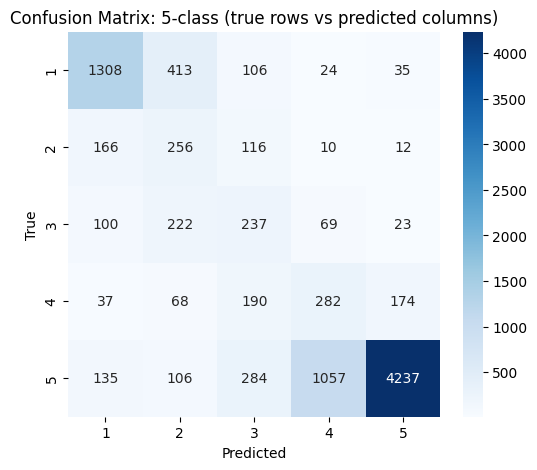

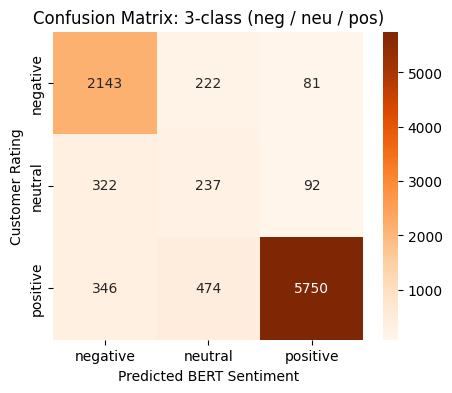

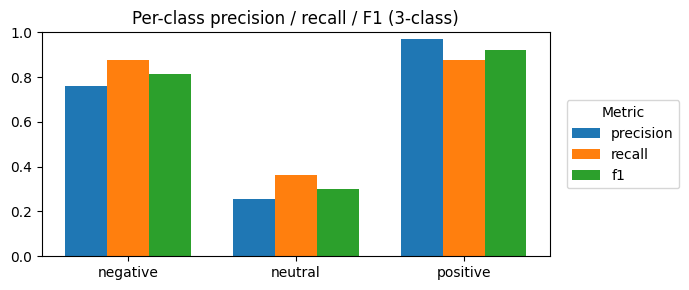

Note: treat these metrics as comparison to noisy proxy labels (customer star ratings).


In [ ]:
# Visualization: confusion-matrix heatmaps and per-class P/R/F1 (3-class)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import precision_recall_fscore_support

# 5-class confusion heatmap
try:
    plt.figure(figsize=(6,5))
    sns.heatmap(cm5_df, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix: 5-class (true rows vs predicted columns)')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
except NameError:
    print('cm5_df not found in the notebook state; run the evaluation cell first.')

# 3-class confusion heatmap (neg/neu/pos)
try:
    plt.figure(figsize=(5,4))
    sns.heatmap(cm3_df, annot=True, fmt='d', cmap='Oranges')
    plt.title('Confusion Matrix: 3-class (neg / neu / pos)')
    plt.xlabel('Predicted BERT Sentiment')
    plt.ylabel('Customer Rating')
    plt.show()
except NameError:
    print('cm3_df not found in the notebook state; run the evaluation cell first.')

# Bar chart of precision / recall / f1 for 3-class
try:
    labels3 = ['negative', 'neutral', 'positive']
    prec, rec, f1, _ = precision_recall_fscore_support(eval_df['true_3'], eval_df['pred_3'], labels=labels3, zero_division=0)
    x = np.arange(len(labels3))
    width = 0.25
    fig, ax = plt.subplots(figsize=(7,3))
    ax.bar(x - width, prec, width, label='precision')
    ax.bar(x, rec, width, label='recall')
    ax.bar(x + width, f1, width, label='f1')
    ax.set_xticks(x)
    ax.set_xticklabels(labels3)
    ax.set_ylim(0,1)
    ax.set_title('Per-class precision / recall / F1 (3-class)')
    ax.legend(title='Metric', loc='center left', bbox_to_anchor=(1.02, 0.5))
    plt.tight_layout()
    plt.show()
except Exception as e:
    print('Could not plot per-class scores:', e)

# Helpful reminder
print("Note: treat these metrics as comparison to noisy proxy labels (customer star ratings).")

# Emotion Analysis: DistilRoBERTa Emotion model #

In [35]:
emotion_classifier = pipeline(
    "text-classification",
    model="j-hartmann/emotion-english-distilroberta-base",
    return_all_scores=True  # returns scores for all emotion labels
)

Device set to use cpu
c:\Users\Samiha\Documents\BTT AI Nestle Project\Nestle_1B-main\venv\Lib\site-packages\transformers\pipelines\text_classification.py:111: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [36]:
def classify_with_truncation(reviews, classifier, batch_size=32, max_length=512):
    """
    classifier: the HuggingFace pipeline (text-classification or zero-shot, etc.)
    reviews: list[str]
    Returns a list of classifier outputs (one entry per review).
    """
    results = []
    for i in range(0, len(reviews), batch_size):
        batch = reviews[i:i+batch_size]
        # pass truncation and max_length to pipeline call
        out = classifier(batch, truncation=True, max_length=max_length, padding=True)
        results.extend(out)
    return results

reviews = df_final["text"].tolist()
results = classify_with_truncation(reviews, emotion_classifier, batch_size=32, max_length=512)

# Extract the emotion with the highest score for each review
df_final["emotion_prediction"] = [max(res, key=lambda x: x['score'])["label"] for res in results]


In [37]:
df_final.head(10)

,average_rating,rating_number,details,parent_asin,rating,timestamp,text,rating_smooth,year,bert_sentiment_label,bert_sentiment_score,rating_sentiment,bert_sentiment_cat,emotion_prediction
14030,4.2,33,Chocolate,B07HVKQ8MF,5.0,2020-01-01 00:52:17.153,I loved this product so much! I will definitel...,5.000000,2020,5 stars,5,positive,positive,joy
7032,4.2,1507,Lemon,B003DU4MGM,5.0,2020-01-01 00:52:19.984,Each small tartlette is individually wrapped a...,5.000000,2020,5 stars,5,positive,positive,neutral
22015,4.1,268,Chocolate,B07YXFXNNV,4.0,2020-01-01 04:21:08.786,Super cute. It was just a lot smaller than I ...,4.500000,2020,4 stars,4,positive,positive,joy
25327,4.7,380,Vanilla,B000B8SR8I,5.0,2020-01-01 06:18:41.436,The coffee shop at our hospital carried this b...,5.000000,2020,5 stars,5,positive,positive,neutral
3042,4.6,3178,Caramel,B0B5FCW9NB,5.0,2020-01-01 11:59:26.711,The 60 pops arrived in a resealable bag to kee...,5.000000,2020,5 stars,5,positive,positive,neutral
22496,4.4,1826,Cinnamon,B072QCZQC4,4.0,2020-01-01 16:58:19.580,Good,4.000000,2020,4 stars,4,positive,positive,neutral
27810,4.5,931,Chocolate,B00F1DBI5C,5.0,2020-01-01 17:36:33.577,"I used to love these when I lived in the UK, a...",4.666667,2020,5 stars,5,positive,positive,joy
2058,4.3,73,Chocolate,B07YXBJ6WH,5.0,2020-01-01 21:53:03.175,These are very delicious and addicting!,4.666667,2020,5 stars,5,positive,positive,joy
569,4.4,4525,Vanilla,B08FVLQ5DD,5.0,2020-01-01 22:13:42.612,The cookies arrived in time for Christmas. Th...,5.000000,2020,5 stars,5,positive,positive,joy
14907,4.7,6765,Caramel,B07NJ13PC8,5.0,2020-01-01 23:13:28.232,Loved it. Good flavor.,5.000000,2020,5 stars,5,positive,positive,joy


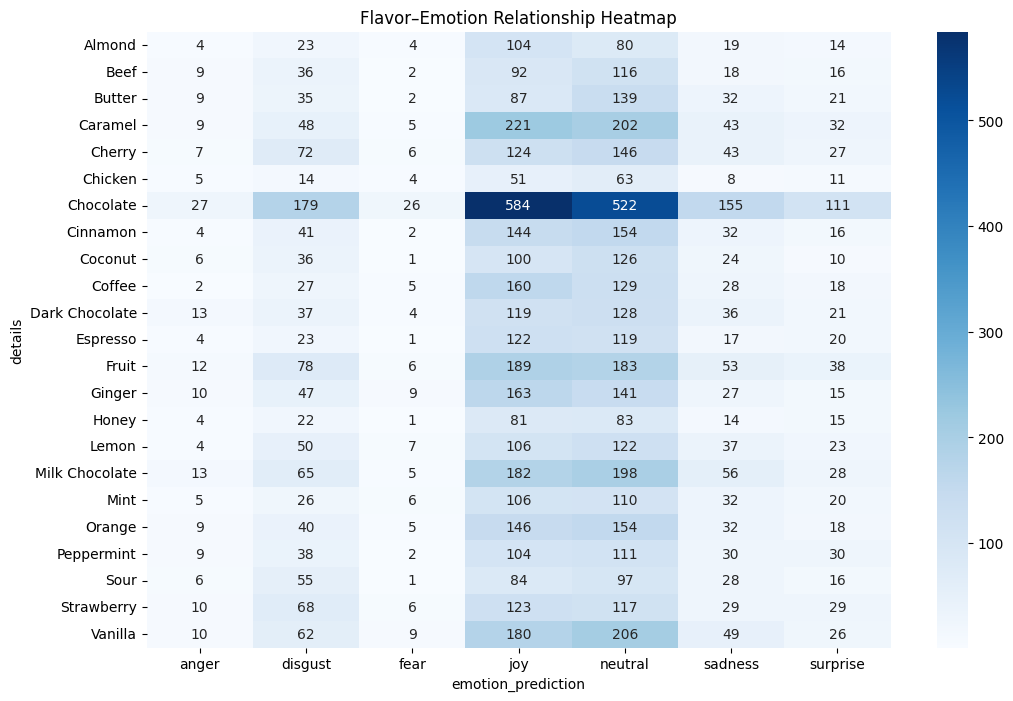

In [38]:
heat = df_final.groupby(['details', 'emotion_prediction']).size().reset_index(name='count')
pivot = heat.pivot(index='details', columns='emotion_prediction', values='count').fillna(0)

plt.figure(figsize=(12,8))
sns.heatmap(pivot, annot=True, fmt='g', cmap='Blues')
plt.title("Flavor–Emotion Relationship Heatmap")
plt.show()

Pivot sample for flavor: Vanilla
emotion_prediction  anger  disgust  fear  joy  neutral  sadness  surprise
month                                                                    
2020-01-01            0.0      4.0   0.0  9.0     10.0      0.0       2.0
2020-02-01            0.0      2.0   0.0  8.0      3.0      0.0       0.0
2020-03-01            0.0      1.0   0.0  2.0      9.0      1.0       0.0
2020-04-01            0.0      1.0   0.0  6.0      4.0      1.0       0.0
2020-05-01            0.0      2.0   1.0  4.0      5.0      3.0       1.0


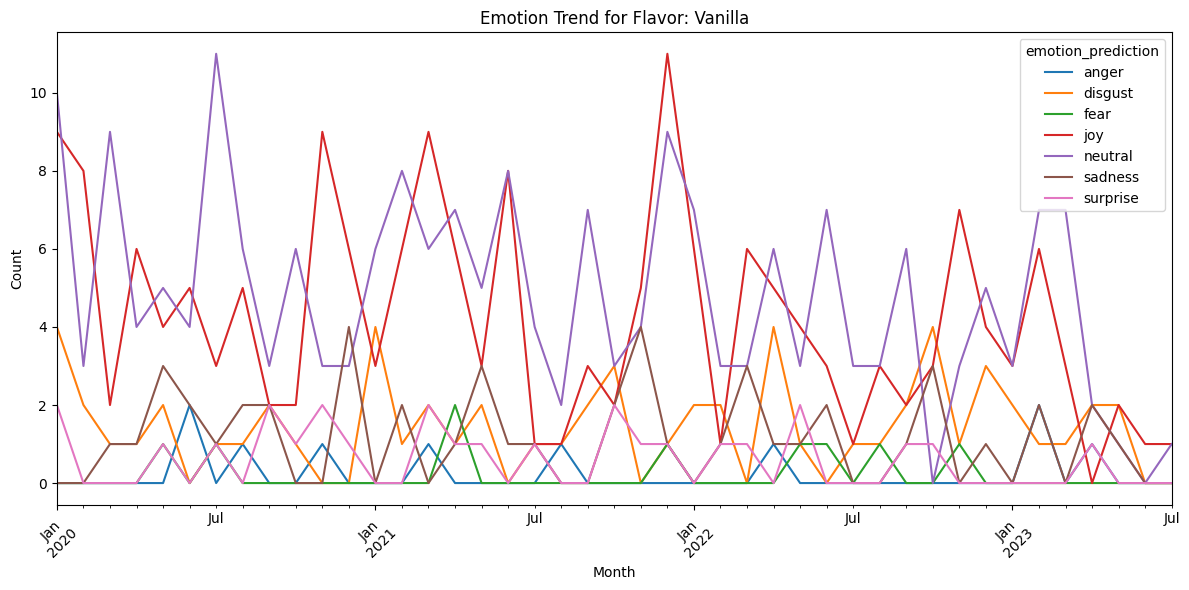

In [39]:
# Ensure `timestamp` is a datetime and create a monthly period column
import pandas as pd
import matplotlib.pyplot as plt

# Ensure timestamp is datetime (handles ms/unix ints or already-datetimes)
if not pd.api.types.is_datetime64_any_dtype(df_final['timestamp']):
    try:
        df_final['timestamp'] = pd.to_datetime(df_final['timestamp'], unit='ms', errors='coerce')
    except Exception:
        df_final['timestamp'] = pd.to_datetime(df_final['timestamp'], errors='coerce')

# Create a `month` column as a timestamp representing the period start (useful for plotting)
df_final['month'] = df_final['timestamp'].dt.to_period('M').dt.to_timestamp()

# Choose flavor dynamically
flavor = "Vanilla"   # change this dynamically

# Subset and group by month + emotion_prediction
sub = df_final[df_final['details'] == flavor].copy()
sub_grouped = (
    sub
    .groupby(['month', 'emotion_prediction'])
    .size()
    .reset_index(name='count')
)

# Sort by month so plotting x-axis is in chronological order
sub_grouped = sub_grouped.sort_values('month')

# Pivot so each emotion is a column
pivot = sub_grouped.pivot(index='month', columns='emotion_prediction', values='count').fillna(0)

# Show a sample of the pivot to verify grouping
print(f"Pivot sample for flavor: {flavor}")
print(pivot.head())

# Plot the time series of emotions for this flavor
pivot.plot(figsize=(12,6))
plt.title(f"Emotion Trend for Flavor: {flavor}")
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
